In [13]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, \
precision_recall_curve,precision_score,f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score as AUC

In [2]:
data  = pd.read_table('C:/Users/kashyap.gaglani/Documents/Data/DS_Tech_Review_Dataset (1).txt',delimiter="|")
data.shape

(300000, 128)

In [3]:
data.head()

,product,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,...,AGE60_64,AGE65_69,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM
0,VIDEO/DATA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0563,0.0201,0.0181,0.0241,0.0141,0.0101,0.0101,0.0121,0.0040,1
1,VIDEO ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0848,0.0565,0.0141,0.0318,0.0265,0.0106,0.0230,0.0159,0.0124,0
2,VIDEO/DATA/VOICE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0579,0.0269,0.0103,0.0207,0.0083,0.0165,0.0041,0.0083,0.0207,1
3,DATA ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0557,0.0436,0.0097,0.0363,0.0170,0.0170,0.0242,0.0218,0.0291,0
4,DATA/VOICE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0302,0.0274,0.0238,0.0183,0.0064,0.0110,0.0027,0.0027,0.0238,0


In [4]:
data.describe()

,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,vod_program,...,AGE60_64,AGE65_69,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM
count,300000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,300000.000000
mean,0.023347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055887,0.041227,0.012636,0.030401,0.024018,0.012636,0.018619,0.015763,0.012945,0.463297
std,0.151002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024309,0.026023,0.006368,0.024749,0.023621,0.006418,0.022320,0.025188,0.006571,0.498652
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039300,0.025100,0.008300,0.016100,0.010900,0.008300,0.006900,0.004300,0.008400,0.000000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.053200,0.036400,0.012500,0.025100,0.018500,0.012500,0.013000,0.009200,0.012800,0.000000
75%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069000,0.050500,0.016700,0.036800,0.029200,0.016800,0.022400,0.017600,0.017200,1.000000
max,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.333300,0.142900,0.500000,0.357100,0.095200,0.383400,0.625000,0.104000,1.000000


In [5]:
data.isnull().sum()

product                         0
target                          0
dvr_playback               300000
dvr_program                300000
dvr_view                   300000
linear_chan                300000
linear_program             300000
linear_view                300000
viewing                    300000
vod_playback               300000
vod_program                300000
vod_view                   300000
bs_tech_service_working    299902
never_pay_flag             300000
svcr_issue_resolved        299633
t2_channel                 300000
t2_dvr_playback            300000
t2_dvr_program             300000
t2_dvr_view                300000
t2_linear_chan             300000
t2_linear_program          300000
t2_linear_view             300000
t2_program                 300000
t2_viewing                 300000
t2_vod_playback            300000
t2_vod_programs            300000
t2_vod_view                300000
echan_full_court                0
echan_game_plan                 0
mls_direct_kic

In [7]:
mis_val_percent = 100 * data.isnull().sum()/len(data)
percent = pd.DataFrame(mis_val_percent)
percent[percent[0]>50]

,0
dvr_playback,100.000000
dvr_program,100.000000
dvr_view,100.000000
linear_chan,100.000000
linear_program,100.000000
linear_view,100.000000
viewing,100.000000
vod_playback,100.000000
vod_program,100.000000
vod_view,100.000000


## Number of enteries by each product combo

In [12]:
(pd.DataFrame(data.groupby(['product'])['product'].count()))['product'].sort_values(ascending=False)

product
VIDEO/DATA/VOICE         107215
VIDEO/DATA                82758
DATA ONLY                 46146
VIDEO ONLY                41050
DATA/VOICE                10448
VIDEO/DATA/VOICE/HOME      4992
VIDEO/DATA/HOME            3167
VIDEO/VOICE                2964
VOICE ONLY                  747
DATA/HOME                   308
DATA/VOICE/HOME             113
HOME ONLY                    75
VIDEO/HOME                    9
VIDEO/VOICE/HOME              7
VOICE/HOME                    1
Name: product, dtype: int64

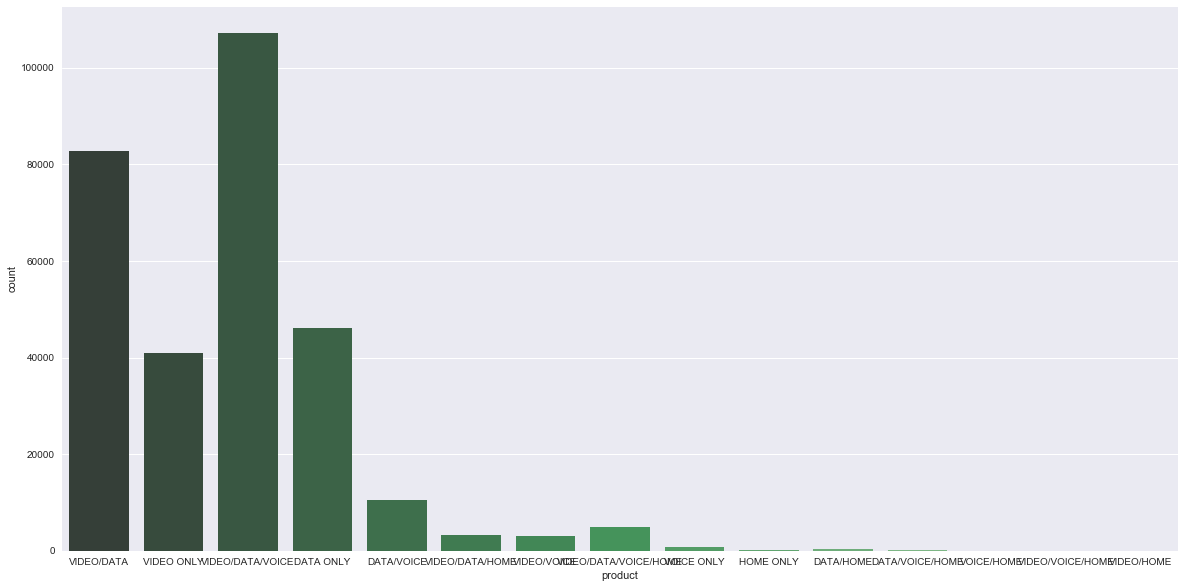

In [9]:
#no of upgrades accepted vs rejected
plt.subplots(figsize=(20,10))
sns.countplot(x='product',data=data,palette="Greens_d")

In [74]:
cross_sell = pd.DataFrame(data[data.target == 1].groupby("product")["product"].count())
cross_sell.sort_values("product",ascending=False).head(10)

,product
product,
VIDEO/DATA,2532
DATA ONLY,2313
VIDEO ONLY,1213
VIDEO/DATA/VOICE,434
DATA/VOICE,246
VIDEO/VOICE,166
VIDEO/DATA/HOME,45
VOICE ONLY,28
DATA/HOME,9


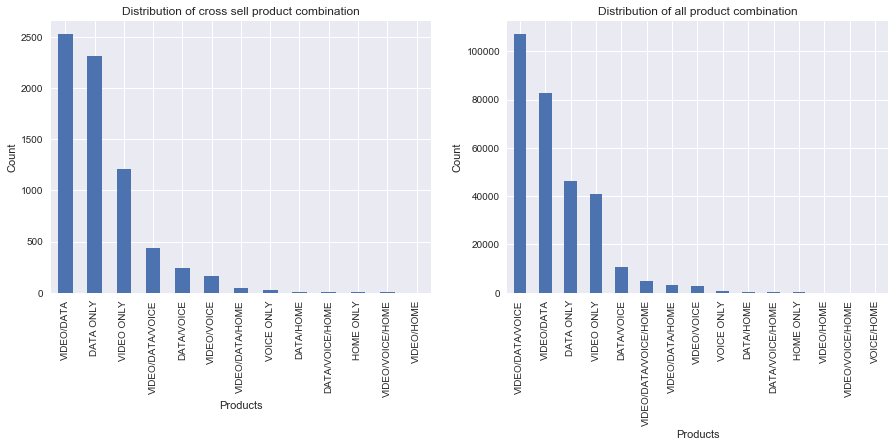

In [104]:
plot = data[data['target'] == 1]
fig = plt.figure(figsize = (15,5))
plt.subplot2grid((1,2),(0,0))
#target vs Attribute1
plot['product'].value_counts().plot(kind='bar')
plt.title("Distribution of cross sell product combination")
plt.xlabel("Products")
plt.ylabel("Count")

plot = data
plt.subplot2grid((1,2),(0,1))
plot['product'].value_counts().plot(kind='bar')
plt.title("Distribution of all product combination")
plt.xlabel("Products")
plt.ylabel("Count")


In [111]:
Age_Dist = data.iloc[:,85:127]
Age_Dist['product'] = data.iloc[:,0]
Age_Dist.drop(['AGE18UP','AGE21UP'],inplace=True,axis=1)
temp = pd.DataFrame(Age_Dist.groupby('product').mean())
Dist = temp.T
#temp['product'] = temp.index

Dist = temp.T
temp.head()

,AGE0,AGE0_4,AGE1,AGE10,AGE10_14,AGE11,AGE12,AGE13,AGE14,AGE15,...,AGE6,AGE60_64,AGE65_69,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9
product,,,,,,,,,,,,,,,,,,,,,
DATA ONLY,0.013799,0.068997,0.013735,0.013247,0.065103,0.012985,0.012874,0.012912,0.013102,0.013291,...,0.013364,0.050584,0.035350,0.013077,0.025011,0.018981,0.013046,0.014159,0.011760,0.013297
DATA/HOME,0.013813,0.072967,0.014604,0.014668,0.072587,0.014775,0.014314,0.014475,0.014378,0.014688,...,0.014829,0.050027,0.035014,0.014752,0.024162,0.017850,0.014818,0.013107,0.010658,0.014712
DATA/VOICE,0.012688,0.065131,0.012817,0.013761,0.068374,0.013618,0.013496,0.013643,0.013874,0.014143,...,0.013409,0.055764,0.039765,0.013288,0.028190,0.021463,0.013307,0.016107,0.013301,0.013664
DATA/VOICE/HOME,0.012541,0.068241,0.014073,0.014688,0.073675,0.014386,0.015003,0.014392,0.015224,0.014859,...,0.013734,0.054497,0.035512,0.013957,0.025294,0.018397,0.014470,0.014028,0.012160,0.014791
HOME ONLY,0.013733,0.070396,0.013721,0.014756,0.074415,0.014133,0.015500,0.014217,0.015841,0.015635,...,0.014519,0.048901,0.033295,0.015012,0.023275,0.016668,0.014989,0.011504,0.008845,0.015305


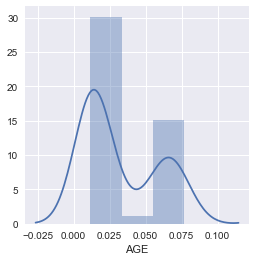

In [112]:
plt.subplots(figsize=(4,4))
sns.distplot(Dist['VIDEO/DATA/VOICE'],hist=True,axlabel='AGE')


In [54]:
Rating = pd.DataFrame(data.groupby('product')['resi_tech_overall_sat'].mean())
Rating['Count'] = pd.DataFrame(data.groupby('product')['resi_tech_overall_sat'].count())
Rating.sort_values('Count',ascending=False)

,resi_tech_overall_sat,Count
product,,
VIDEO/DATA/VOICE,4.678524,759
VIDEO/DATA,4.704365,504
DATA ONLY,4.587678,211
VIDEO ONLY,4.680982,163
VIDEO/DATA/VOICE/HOME,4.674157,89
VIDEO/DATA/HOME,4.634921,63
DATA/VOICE,4.567568,37
VIDEO/VOICE,5.000000,17
DATA/HOME,4.250000,4


In [3]:
data_clean = data
data_clean.head()

,product,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,...,AGE60_64,AGE65_69,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM
0,VIDEO/DATA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0563,0.0201,0.0181,0.0241,0.0141,0.0101,0.0101,0.0121,0.0040,1
1,VIDEO ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0848,0.0565,0.0141,0.0318,0.0265,0.0106,0.0230,0.0159,0.0124,0
2,VIDEO/DATA/VOICE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0579,0.0269,0.0103,0.0207,0.0083,0.0165,0.0041,0.0083,0.0207,1
3,DATA ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0557,0.0436,0.0097,0.0363,0.0170,0.0170,0.0242,0.0218,0.0291,0
4,DATA/VOICE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0302,0.0274,0.0238,0.0183,0.0064,0.0110,0.0027,0.0027,0.0238,0


In [4]:
def Data_Cleaning(data_clean):
    data_clean['MAJOR_CREDIT_CARD_LIF'].fillna('NA',inplace=True)
    label = preprocessing.LabelEncoder()
    data_clean['product_num'] = label.fit_transform(data_clean['product'])
    data_clean['Major_Credit_card'] = label.fit_transform(data_clean['MAJOR_CREDIT_CARD_LIF'])
    return data_clean

In [6]:
data_clean = Data_Cleaning(data)
data_clean.head()

,product,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,...,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM,product_num,Major_Credit_card
0,VIDEO/DATA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0181,0.0241,0.0141,0.0101,0.0101,0.0121,0.0040,1,6,0
1,VIDEO ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0141,0.0318,0.0265,0.0106,0.0230,0.0159,0.0124,0,5,1
2,VIDEO/DATA/VOICE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0103,0.0207,0.0083,0.0165,0.0041,0.0083,0.0207,1,8,0
3,DATA ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0097,0.0363,0.0170,0.0170,0.0242,0.0218,0.0291,0,0,0
4,DATA/VOICE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0238,0.0183,0.0064,0.0110,0.0027,0.0027,0.0238,0,2,0


In [7]:
Product_Info  = data_clean[['product','product_num']]
data_clean1  = data_clean.drop(['product','MAJOR_CREDIT_CARD_LIF'],axis=1)
data_clean1.fillna(0,inplace=True)
data_clean1.head()

,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,vod_program,...,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM,product_num,Major_Credit_card
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0181,0.0241,0.0141,0.0101,0.0101,0.0121,0.0040,1,6,0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0141,0.0318,0.0265,0.0106,0.0230,0.0159,0.0124,0,5,1
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0103,0.0207,0.0083,0.0165,0.0041,0.0083,0.0207,1,8,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0097,0.0363,0.0170,0.0170,0.0242,0.0218,0.0291,0,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0238,0.0183,0.0064,0.0110,0.0027,0.0027,0.0238,0,2,0


In [8]:
data_clean2 = pd.DataFrame(preprocessing.MaxAbsScaler().fit_transform(data_clean1),columns = data_clean1.columns)

In [9]:
sample = data_clean1.sample(frac=.3,replace=False,random_state=23)
data_y = sample['product_num']
data_x = sample.drop('product_num',axis=1)

In [10]:
svd = TruncatedSVD(n_components=12,random_state=23)
Trans_matrix = svd.fit_transform(data_x)
Trans_matrix.shape

(90000, 12)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(data_x,data_y, test_size=0.4)

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(Trans_matrix,data_y, test_size=0.4)

In [14]:
knn = KNeighborsClassifier(n_neighbors=2)
knn_model = knn.fit(xtrain,ytrain)
knn_pred = knn_model.predict(xtest)
print(accuracy_score(ytest,knn_pred))

0.749611111111


## Classification based method for product cross selling

In [15]:
data_class = data
data_class = Data_Cleaning(data_class)

In [16]:
Product_Info  = data_class[['product','product_num']]
data_class1  = data_class.drop(['product','MAJOR_CREDIT_CARD_LIF'],axis=1)
data_class1.fillna(0,inplace=True)
data_class1.head()

,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,vod_program,...,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM,product_num,Major_Credit_card
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0181,0.0241,0.0141,0.0101,0.0101,0.0121,0.0040,1,6,0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0141,0.0318,0.0265,0.0106,0.0230,0.0159,0.0124,0,5,1
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0103,0.0207,0.0083,0.0165,0.0041,0.0083,0.0207,1,8,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0097,0.0363,0.0170,0.0170,0.0242,0.0218,0.0291,0,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0238,0.0183,0.0064,0.0110,0.0027,0.0027,0.0238,0,2,0


In [17]:
data_class2 = pd.DataFrame(preprocessing.MaxAbsScaler().fit_transform(data_class1),columns = data_clean1.columns)

In [19]:
data_class2.target.describe()

count    300000.000000
mean          0.023347
std           0.151002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

In [20]:
data_class2.groupby('target')['target'].count()

target
0.0    292996
1.0      7004
Name: target, dtype: int64

In [21]:
data_0cross_sell = data_class2[data_class2['target']==0]
data_1cross_sell = data_class2[data_class2['target']==1]
data_0downsample = resample(data_0cross_sell,replace = False, n_samples = 7004,random_state=34)
data_resampled = pd.concat([data_0downsample,data_1cross_sell])
target = data_resampled['target']
data_resampled.head()

,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,vod_program,...,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM,product_num,Major_Credit_card
88379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.037789,0.0810,0.128815,0.113445,0.042254,0.02160,0.103846,1.0,0.428571,0.5
40343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119664,0.0368,0.058247,0.128151,0.067032,0.01952,0.117308,0.0,0.571429,0.5
101310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.102169,0.0876,0.063568,0.101891,0.029734,0.02848,0.093269,1.0,0.428571,0.0
152757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.091672,0.0950,0.082610,0.120798,0.025561,0.02096,0.063462,1.0,0.571429,0.5
295130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133660,0.0246,0.018762,0.094538,0.017475,0.00720,0.194231,1.0,0.428571,0.5


In [22]:
data_y = data_resampled.drop('target',axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(data_y,target, test_size=0.4)

In [23]:
#defining a metrics function to evaluate a model
def Metrics(ytest,pred):
    print('accuray:', accuracy_score(ytest,pred),',recall score:',recall_score(ytest,pred),'\n ConfusionMatrix: \n',confusion_matrix(ytest,pred))
    #model_rf.feature_importances_
    average_precision = average_precision_score(ytest,pred)
    print('average_precision_score: ',average_precision_score(ytest,pred))
    print('Precision Score:',precision_score(ytest,pred_rf),'F1_score:',f1_score(ytest,pred_rf))
    
    precision, recall,_ = precision_recall_curve(ytest,pred)
    plt.step(recall,precision, color='b',alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,\
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(\
              average_precision))
    #plt.title(algo)

accuray: 0.708779443255 ,recall score: 0.860580325548 
 ConfusionMatrix: 
 [[1540 1238]
 [ 394 2432]]
average_precision_score:  0.796778774451
Precision Score: 0.662670299728 F1_score: 0.748768472906


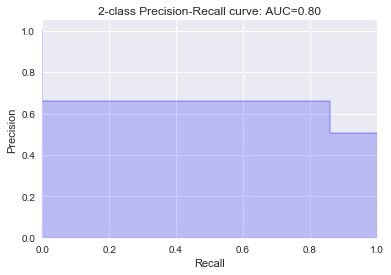

In [24]:
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, \
                            max_depth=5,random_state=72)
model_rf = rf.fit(xtrain,ytrain)
pred_rf = model_rf.predict(xtest)
Metrics(ytest,pred_rf)

In [57]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = preprocessing.MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [62]:
ranks["RF"] = ranking(model_rf.feature_importances_, data_resampled.columns)
Features = pd.DataFrame(ranks)
Features[Features['RF']>0.01].sort_values('RF',ascending = False).head(10)

,RF
PREMIUM,1.00
data_penetration_pct,0.71
prev_number_of_products,0.52
bllng_amt,0.52
infin_ind,0.31
cloud_dvr,0.31
prev_rgu_voice,0.28
delinquent_90_balance_amt,0.27
data_total_gb,0.21
offer_months_duration,0.20


In [48]:
index = Features[Features['RF']>0.01].index
index

Index(['AGE0', 'AGE10_14', 'AGE13', 'AGE15', 'AGE18UP', 'AGE19', 'AGE20',
       'AGE20_24', 'AGE21UP', 'AGE25_29', 'AGE3', 'AGE35_39', 'AGE45_49',
       'AGE50_54', 'AGE6', 'AGE65_69', 'AGE75_79', 'AGE8', 'AGE9',
       'DVD_LOVERS', 'IVR_RESOLVED_T1', 'PREMIUM', 'SPIX', 'bllng_amt',
       'bulk_ind', 'cloud_dvr', 'data_penetration_pct', 'data_total_gb',
       'delinquent_90_balance_amt', 'fcomp_internet', 'hic_macs_count',
       'home_system_upgrades', 'infin_ind', 'offer_months_duration',
       'prev_number_of_products', 'prev_rgu_voice', 'tellop_ind',
       'total_vod_free_lease', 'ucomp', 'video_days_on_books',
       'video_penetration_pct', 'vin_ind'],
      dtype='object')

In [56]:
data_y_mod = data_y[['AGE0', 'AGE10_14', 'AGE13', 'AGE15', 'AGE18UP', 'AGE19', 'AGE20', \
       'AGE20_24', 'AGE21UP', 'AGE25_29', 'AGE3', 'AGE35_39', 'AGE45_49', \
       'AGE50_54', 'AGE6', 'AGE65_69', 'AGE75_79', 'AGE8', 'AGE9', \
       'DVD_LOVERS', 'IVR_RESOLVED_T1', 'PREMIUM', 'SPIX', 'bllng_amt', \
       'bulk_ind', 'cloud_dvr', 'data_penetration_pct', 'data_total_gb', \
       'delinquent_90_balance_amt', 'fcomp_internet', 'hic_macs_count', \
       'home_system_upgrades', 'infin_ind', 'offer_months_duration', \
       'prev_number_of_products', 'prev_rgu_voice', 'tellop_ind', \
       'total_vod_free_lease', 'ucomp', 'video_days_on_books', \
       'video_penetration_pct', 'vin_ind']]
xtrain,xtest,ytrain,ytest = train_test_split(data_y_mod,target, test_size=0.4)

In [45]:
Features.index

Index(['AGE0', 'AGE0_4', 'AGE1', 'AGE10', 'AGE10_14', 'AGE11', 'AGE12',
       'AGE13', 'AGE14', 'AGE15',
       ...
       'video_addon_music_choice', 'video_days_on_books',
       'video_penetration_pct', 'viewing', 'vin_ind', 'vod_playback',
       'vod_program', 'vod_view', 'voice_total_min', 'x1_platform'],
      dtype='object', length=127)

accuray: 0.627408993576 ,recall score: 0.620430107527 
 ConfusionMatrix: 
 [[1785 1029]
 [1059 1731]]
average_precision_score:  0.718288091656
Precision Score: 0.50408719346 F1_score: 0.572755417957


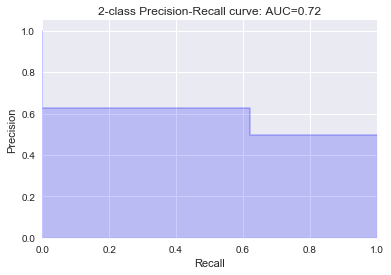

In [63]:
#decision tree classifier
DT = DecisionTreeClassifier(random_state=12)
model_dt = DT.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
Metrics(ytest,pred_dt)


In [65]:
ranks["RF"] = ranking(model_dt.feature_importances_, data_resampled.columns)
Features = pd.DataFrame(ranks)
Features[Features['RF']>0.01].sort_values('RF',ascending = False).head(10)

,RF
svcr_overall_sat,1.00
t2_vod_playback,0.48
echan_game_plan,0.38
video_addon_family_tier,0.29
svod_bollywood_hits,0.27
vod_view,0.25
video_addon_music_choice,0.25
t2_dvr_program,0.25
echan_full_court,0.24
target,0.24


accuray: 0.685046395432 ,recall score: 0.807501769285 
 ConfusionMatrix: 
 [[1557 1221]
 [ 544 2282]]
average_precision_score:  0.778008454834
Precision Score: 0.662670299728 F1_score: 0.748768472906


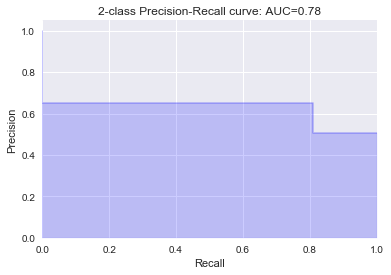

In [36]:
#svm
modelsvc = SVC(kernel='linear')
modelsvc.fit(xtrain,ytrain)
pred_svm = modelsvc.predict(xtest)
Metrics(ytest,pred_svm)

accuray: 0.69289793005 ,recall score: 0.755484784147 
 ConfusionMatrix: 
 [[1748 1030]
 [ 691 2135]]
average_precision_score:  0.776677563634
Precision Score: 0.662670299728 F1_score: 0.748768472906


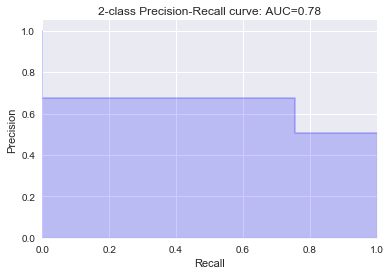

In [37]:
logis = LogisticRegression()
model_log = logis.fit(xtrain,ytrain)
pred_log = model_log.predict(xtest)
Metrics(ytest,pred_log)

accuray: 0.697180585296 ,recall score: 0.77311827957 
 ConfusionMatrix: 
 [[1750 1064]
 [ 633 2157]]
average_precision_score:  0.77787055836
Precision Score: 0.50408719346 F1_score: 0.572755417957


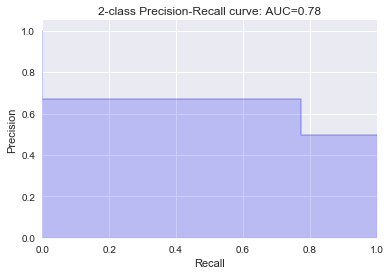

In [73]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
pred_ada = model_ada.predict(xtest)
Metrics(ytest,pred_ada)

In [38]:
def model_comparison(X_train,X_test, y_train,y_test):
    lr = LogisticRegression()
    gnb = GaussianNB()
    svc = LinearSVC(C=1.0)
    rfc = RandomForestClassifier(n_estimators=100)
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),\
                      (gnb, 'Naive Bayes'),\
                      (svc, 'Support Vector Classification'),\
                      (rfc, 'Random Forest')]:
        clf.fit(X_train, y_train)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)
    
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s" % (name, ))
    
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
    
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    
    plt.tight_layout()
    plt.show()

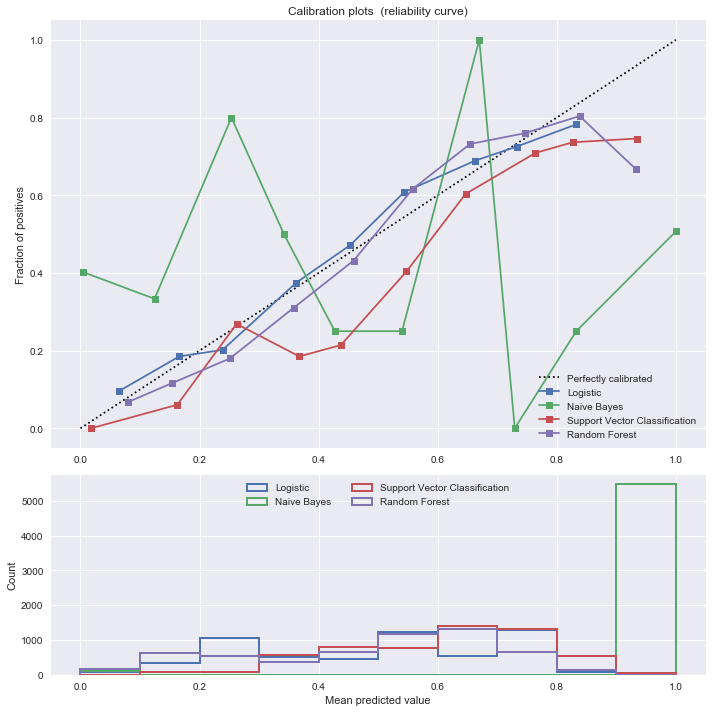

In [39]:
model_comparison(xtrain,xtest,ytrain,ytest)